In [1]:
!pip install vaderSentiment

In [1]:
import csv
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pandas as pd
import os.path

data_sufix = 'data/'

In [25]:
# configure Session class with desired options
Session = sessionmaker()
engine = create_engine('sqlite:///twitter.db')

In [3]:
engine.table_names()

['hashtag', 'retweet', 'tweet', 'user', 'vader']

In [4]:
#VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

allTweets = pd.read_sql_query('SELECT tweet_id as id, tweet_text as text FROM tweet', engine)
print(allTweets.shape)

(17220, 2)


In [5]:
allRetweets =  pd.read_sql_query('SELECT retweet_id as id, retweet_text as text FROM retweet', engine)
print(allRetweets.shape)

(77828, 2)


In [10]:
vaderData = allTweets.append([allRetweets])
vaderData.drop_duplicates(inplace=True)
# vaderData = vaderData[:60000]
vaderData.shape

(91267, 2)

In [7]:
vaderIDs = pd.read_sql_query('SELECT id FROM vader', engine)
solo = vaderIDs.drop_duplicates()
print(solo.shape)
vaderIDs.shape

(91265, 1)


(91267, 1)

In [8]:
newVaders = pd.DataFrame(columns=['id', 'negative','neutral','positive','compound'])

In [9]:
for index, row in vaderData.iterrows():
     if(not vaderIDs['id'].isin([row['id']]).any()):
        snt = analyser.polarity_scores(row['text'])
        newVaders = newVaders.append({'id': row['id'],
                                     'negative': snt['neg'],
                                     'neutral': snt['neu'],
                                     'positive': snt['pos'],
                                     'compound': snt['compound']}, ignore_index=True)
newVaders

,id,negative,neutral,positive,compound


In [50]:
newVaders.to_sql('vader', engine, if_exists='append')

In [39]:
# from sqlalchemy import MetaData, Table
# meta = MetaData()
# vader_tab = Table('vader', meta)
# vader_tab.drop(engine)

In [26]:
#Analyse
analyse_df = pd.read_sql_query('SELECT * FROM vader', engine)
analyse_df.shape

(91267, 6)

In [27]:
for index, row in analyse_df.iterrows():
    final_score = round(row["compound"],2) * 50 + 50
    analyse_df.at[index,'percent'] = final_score
    if(final_score<34):
        analyse_df.at[index,'mood'] = "Bad"
    elif(final_score<67):
        analyse_df.at[index,'mood'] = "Neutral"
    else:
        analyse_df.at[index,'mood'] = "Good"

In [28]:
analyse_df

,index,id,negative,neutral,positive,compound,percent,mood
0,0,1.056095e+18,0.181,0.733,0.086,-0.4939,25.5,Bad
1,1,1.056126e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
2,2,1.056126e+18,0.000,0.848,0.152,0.3612,68.0,Good
3,3,1.056126e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
4,4,1.056126e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
5,5,1.056126e+18,0.179,0.821,0.000,-0.5719,21.5,Bad
6,6,1.056139e+18,0.000,0.863,0.137,0.4019,70.0,Good
7,7,1.056153e+18,0.000,0.851,0.149,0.4215,71.0,Good
8,8,1.056154e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
9,9,1.056165e+18,0.000,1.000,0.000,0.0000,50.0,Neutral


In [29]:
%matplotlib inline

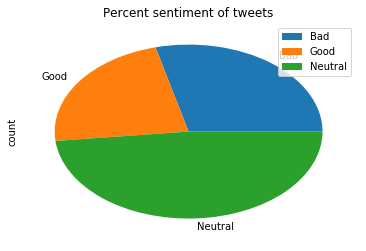

In [52]:
figure = analyse_df[['id', 'mood']].groupby(['mood']).agg(['count']).rename(columns={'id': 'amount'})
figure.plot.pie("amount", title="Percent sentiment of tweets")

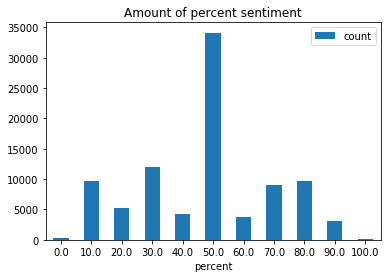

In [70]:

figure2 = analyse_df[['id', 'percent']].round({"percent": -1}).groupby(['percent']).agg(['count']).rename(columns={'id': 'amount'})
figure2.plot.bar( y='amount', rot=0, title="Amount of percent sentiment")

In [24]:
# associate it with our custom Session class
Session.configure(bind=engine)